In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

# Kuramoto model
$$ \dot \varphi_i = \omega_i + \frac K N \sum_{j=1}^N{a_{ij}}\sin(\varphi_j - \varphi_i)$$

0.040812162024283234
(1010,)


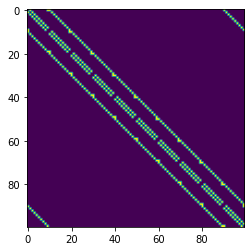

In [2]:
#define all needed variables
N = 10
phi = np.zeros(N)
omega = np.random.uniform(low=-1, high=1, size=(N**2))
# omega = omega**3 - 0.3*omega
K = 9.5

def make_A(N):
    #make an adjaceny matrix for an NxN systems where neighbors are connected. 
    #periodic boundary conditions
    
    #this is super messy, maybe make clearer. 
    
    
    A = np.zeros((N**2,N**2))
    #handle corners
    #top left
    A[0,1] = 1
    A[0,N-1] = 1
    A[0,N] = 1
    A[0, N**2 - N] = 1
    #bottom left
    A[N-1,0] = 1
    A[N-1,N-2] = 1
    A[N-1,N**2 - 1] = 1
    A[N-1, 2*N-1] = 1
#     top right
    A[ N**2 - N,  N**2 - N+1] = 1
    A[ N**2 - N, N**2 - 1] = 1
    A[ N**2 - N, 0] = 1
    A[ N**2 - N,  N**2 - 2*N] = 1
    #bottom right
    A[ N**2 - 1,  N**2 - N] = 1
    A[ N**2 - 1, N**2 - 2] = 1
    A[ N**2 - 1, N**2 - N-1] = 1
    A[ N**2 - 1,  N-1] = 1
    
    #first column
    for i in range(1, N-1):
        A[i, i + N] = 1
        A[i, N**2 - N + i] = 1
        A[i, i + 1] = 1
        A[i, i - 1] = 1
    #first column
    for i in range(1, N-1):
        A[N**2 - N + i, N**2 - N + i+1] = 1
        A[N**2 - N + i, N**2 - N + i-1] = 1
        A[N**2 - N + i, N**2 - 2*N + i] = 1
        A[N**2 - N + i, i] =1
    #first row
    for i in range(1, N-1):
        A[i*N, (i-1)*N] = 1
        A[i*N, (i+1)*N] = 1
        A[i*N, i*N + 1] = 1
        A[i*N, (i+1)*N - 1] = 1
    #last row
    for i in range(2, N):
        A[i*N-1, i*N-2] = 1
        A[i*N-1, i*N-N] = 1
        A[i*N-1, (i-1)*N-1] = 1
        A[i*N-1, (i+1)*N-1] = 1
    #middles
    for i in range(N+1, N**2-N-1):
        if(i%N != N-1) and (i%N != 0):
            A[i, i+1] = 1
            A[i, i-1] = 1
            A[i, i-N] = 1
            A[i, i+N] = 1
    return A

# A = np.ones((N,N)) - np.eye(N) #this is all to all right now, but want to make it so you can set the number of connections
A = make_A(N)
print(np.sum(A)/((N**2-1)**2))
plt.figure()
plt.imshow(A)
dt = 0.01 #timestep size, if this is too large, weird things seem to be happening
T_max = 10.1 #maximum time to run simulation for
t = np.arange(0, T_max, dt)
print(t.shape)

In [3]:
def phi_dot(phi, t, omega, K, A):
    #this is for the Kuramoto oscillator
    N = len(phi)
#     print(K)
#     print(N)
#     i = 0
#     print(A[i])
#     print(phi - phi[i])
    dphi_dt = np.zeros(np.shape(phi))
    for i in range(N):
        dphi_dt[i] = omega[i] + K/N *np.sum(A[i]@np.sin(phi - phi[i])) #+ np.random.normal(0,0.01)
    return dphi_dt

def run_and_graph(omega, K=10, T_max =20, dt = 0.01, p = 1, N = 100):
    plt.figure()
#     if A is None:
    A = make_A(N, p = p)
    sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
    for i in range(min(10, N)):
        plt.plot(np.arange(0, T_max, dt), sol[:,i])
    plt.plot(np.linspace(0,T_max), np.linspace(0,T_max)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)
    plt.xlabel("time")
    plt.ylabel("solution value ")
    plt.title("first 10 phases with p = "+ str(p))
    plt.show()

In [4]:
a = np.array([[0,1],[1,0]])
print(a)
print(phi_dot(np.array([1, 1]), 0, np.random.uniform(0,1,size = (2)), K, a))

[[0 1]
 [1 0]]
[0.40342614 0.23522224]


In [5]:
#do the integration part
A = make_A(N)
sol = odeint(phi_dot, np.random.uniform(0,1,size = (N**2)), np.arange(0, T_max, dt), args=(omega, K, A))

(1010, 100)


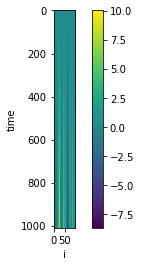

In [6]:
print(sol.shape)
plt.figure()
plt.imshow(sol)
plt.xlabel("i")
plt.ylabel("time")
plt.colorbar()
plt.show()

(1010, 100)


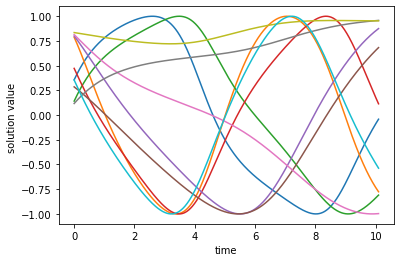

0.039184472545487105


In [7]:
%matplotlib inline
print(sol.shape)
# plt.plot(np.sin(sol[:,0]))
# plt.plot(sol[:,0])
# plt.plot(sol[:,1])
# plt.plot(sol[:,2])
plt.figure()
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), np.sin(sol[:,i]))
plt.xlabel("time")
plt.ylabel("solution value ")
plt.show()

# plt.plot(np.linspace(0,20), np.linspace(0,20)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)

print(np.mean(omega))
# plt.plot(np.sin(sol[:,1]))
# plt.plot(np.sin(sol[:,2]))

In [8]:
u, s, vh = np.linalg.svd(sol)

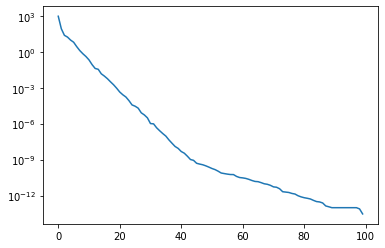

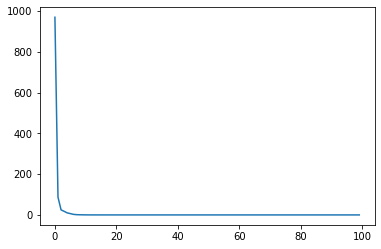

[9.69116871e+02 8.69681129e+01 2.46508356e+01 1.75838068e+01
 9.93106617e+00 6.52407177e+00 2.80050111e+00 1.31174749e+00
 7.12392000e-01 4.18019214e-01 2.17274972e-01 8.76726085e-02
 4.18398192e-02 3.56553711e-02 1.49113576e-02 9.63463659e-03
 5.80481819e-03 3.18103483e-03 1.80484720e-03 9.29799487e-04
 4.48233210e-04 2.64193501e-04 1.71832007e-04 8.52046100e-05
 3.73954597e-05 2.92254696e-05 2.00429175e-05 8.18017822e-06
 5.44903801e-06 3.11104700e-06 1.03276568e-06 9.78082624e-07
 4.57141003e-07 2.57606791e-07 1.50555121e-07 9.24278355e-08
 4.44417221e-08 2.34450735e-08 1.25927851e-08 8.66058042e-09
 4.78087135e-09 3.43939918e-09 1.93228370e-09 1.02214798e-09
 8.71895742e-10 4.95524946e-10 4.24264126e-10 3.71888437e-10
 3.01708758e-10 2.35909610e-10 1.80851232e-10 1.46549272e-10
 1.08190601e-10 7.60183894e-11 6.81386159e-11 6.14894703e-11
 5.67707541e-11 5.61782173e-11 3.93352232e-11 3.18492867e-11
 2.97425583e-11 2.68239269e-11 2.24316118e-11 1.79565295e-11
 1.50123410e-11 1.434030

In [9]:
%matplotlib inline
#plot the singular values
plt.figure()
plt.semilogy(s)
plt.show()

plt.figure()
plt.plot(s)
plt.show()

print(s)

In [22]:
n_important = 2

print(u[:,:n_important].shape)
print(np.diag(s[:n_important]).shape)
print(vh[:n_important,:].shape)
low_rank = (u[:,:n_important]@np.diag(s[:n_important]))@vh[:n_important, :]

(1010, 2)
(2, 2)
(2, 100)


In [23]:
print("MSE error = ", np.linalg.norm(low_rank - sol))

plt.figure()
plt.imshow(sol)
plt.xlabel("i")
plt.ylabel("time")
plt.colorbar()
plt.show()

# plt.imshow(low_rank)
# plt.xlabel("i")
# plt.ylabel("time")
# plt.colorbar()
# plt.show()

plt.figure()
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), sol[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
plt.show()

plt.figure()
for i in range(10):
    plt.plot(np.arange(0, T_max, dt), low_rank[:,i])
plt.xlabel("time")
plt.ylabel("solution value ")
plt.title("low rank solution")
plt.show()


MSE error =  32.685586366401964


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(1010,)


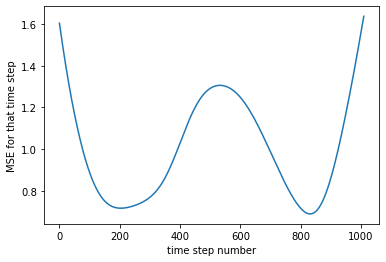

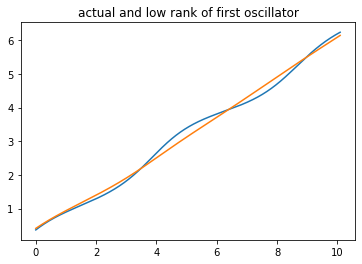

In [24]:
%matplotlib inline

#error plot
error =  np.linalg.norm(low_rank - sol, axis = 1)
print(error.shape)
plt.plot(error)
plt.xlabel("time step number")
plt.ylabel("MSE for that time step")
plt.show()

plt.figure()
plt.plot(np.arange(0, T_max, dt), sol[:,0])
plt.plot(np.arange(0, T_max, dt), low_rank[:,0])
plt.title("actual and low rank of first oscillator")
plt.show()

<IPython.core.display.Javascript object>


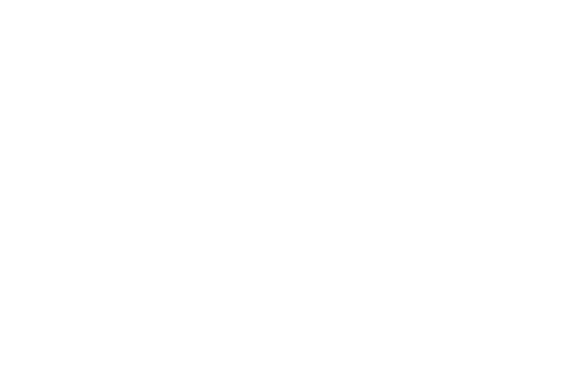

1010


<IPython.core.display.Javascript object>


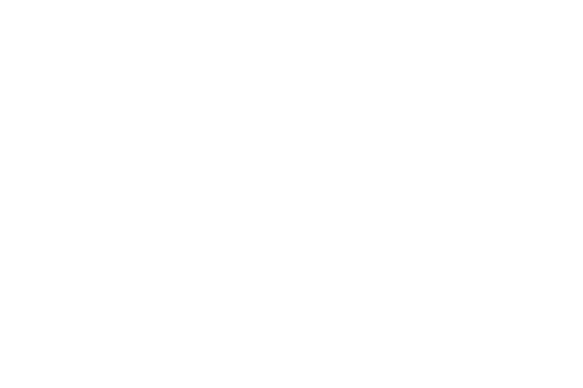

KeyboardInterrupt: 

In [21]:
%matplotlib notebook
#got this example from http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
#animating the solution over time
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes()

vmin = -1
vmax = 1

x = np.sin(sol[0,:].reshape(N, -1).T)
im = plt.imshow(x, interpolation='none', vmin=vmin, vmax=vmax)
# plt.clim(vmin=vmin, vmax=vmax)
plt.colorbar()
# plt.title("0")
title = ax.text(0.5,0.85, "", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=ax.transAxes, ha="center")

# # # initialization function: plot the background of each frame
def init():
    fig = plt.figure()

    x = np.sin(sol[0,:].reshape(N, -1).T)
    im = plt.imshow(x, interpolation='none', vmin=vmin, vmax=vmax)
    plt.clim(vmin=vmin, vmax = vmax)
    plt.colorbar()
    im.set_array(sol[0,:].reshape(N, -1).T)
    return im

t_list = np.arange(0, T_max, dt)
# # animation function.  This is called sequentially
def animate(i):
    x = np.sin(sol[i*2,:].reshape(N, -1).T)
    im.set_data(x)
    title.set_text('t = {0:.{1}f}'.format(t_list[i*2], 2))
    return im, title

(n_time, n_i) = sol.shape

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func = init, save_count=int(n_time/2))#,
#                                frames=200, interval=20, blit=True)

# save the animation 

print(n_time)

writergif = animation.PillowWriter(fps=30)
anim.save('basic_animation5.gif', writer=writergif)#, fps=30)


fig.show()

print("done")

(1010, 100)


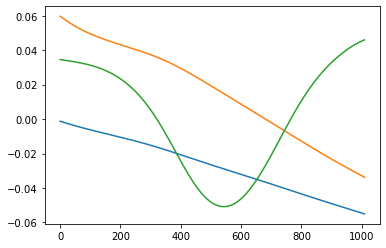

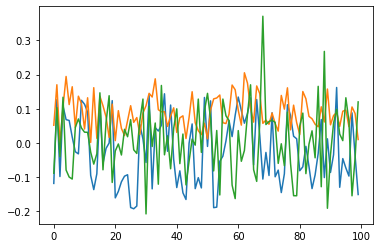

In [81]:
U,Sigma,VT = np.linalg.svd(sol,full_matrices=0)
V = VT.T

print(U.shape)
plt.plot(U[:,0:3])
plt.show()

plt.figure()
plt.plot(V[:,0:3])
plt.show()